In [1]:
from step_02_load_data.main import load
from step_03_clean_data.clean import clean
import pandas as pd
import numpy as np

In [2]:
df=load()

In [3]:
df=clean(df)

In [4]:
df[('my features', 'basic count')]=0
df[('my features', 'advanced count')]=0


In [5]:
coeff=np.array([-8,-5,-1,0,1,5])
state_dic={'\nÀrestaurer\n':coeff[0],
            '\nÀrénover\n':coeff[1],
            '\nÀrafraîchir\n':coeff[2],
            '\nBon\n':coeff[3],
            '\nFraîchementrénové\n':coeff[4],
            '\nExcellentétat\n':coeff[5]}
df[('my features','state_note')]=df[('Group 1','State of the building')].map(state_dic)

In [6]:
df[('my features','malus')]=df[('my features','state_note')]*df[('Group 1','Living Area')]

In [7]:
tests_basic={'has kitchen':df['Group 2','Fully equipped kitchen'],
            'is furnished':df['Group 2','Furnished'],
            'has lot of facades':df['Group 2','Number of facades']>1,
            'has >1 bedrooms':df['Group 1','Number of rooms']>1,
            'has >2 bedrooms':df['Group 1', 'Number of rooms']>2,
            'has >3 bedrooms':df['Group 1','Number of rooms']>3
            }

In [8]:
tests_advanced={
    'has garden':df['Group 2','Garden'],
    'garden is big':df['Group 2','Area of the garden']>100,
    'has lot of land':df['Group 2','Surface of the land']>300,
    'has a swimming pool': df['Group 2','Swimming pool']
}

In [9]:
for key, test in tests_basic.items():
    df.loc[test, ('my features','basic count')] += 1


In [10]:
for key, test in tests_advanced.items():
    df.loc[test, ('my features','advanced count')] += 1

In [11]:
df[('Target','logPrice')] = df[('Target','Price')].apply(lambda x: np.log(x))

In [12]:
df.head()

Target         Group 1                            Group 2  \
               Price Number of rooms Living Area Fully equipped kitchen   
Offer Id                                                                  
rent  1610665  485.0             1.0        40.0                   True   
      2718948  790.0             2.0       140.0                   True   
      3229637  900.0             3.0       103.0                  False   
      3860205  520.0             2.0        50.0                   True   
      4141598  760.0             1.0        55.0                   True   

                                                                      \
              Furnished Open fire Terrace Area of the terrace Garden   
Offer Id                                                               
rent  1610665     False     False   False                 0.0  False   
      2718948     False     False   False                 0.0  False   
      3229637     False     False   False                 0.0   True   
      3860205     False     False   False                 0.0  False   
      4141598     False     False    True                30.0   True   

                                  ...                                  \
              Area of the garden  ... Number of facades Swimming pool   
Offer Id                          ...                                   
rent  1610665                0.0  ...               2.0         False   
      2718948                0.0  ...               2.0         False   
      3229637              330.0  ...               3.0         False   
      3860205                0.0  ...               2.0         False   
      4141598            10000.0  ...               2.0         False   

                            Group 1 Spatial      Group 2 my features  \
              State of the building zipcode         type basic count   
Offer Id                                                               
rent  1610665     \nExcellentétat\n    4020       Studio           2   
      2718948               \nBon\n    3200  Appartement           3   
      3229637               \nBon\n    7020       Maison           3   
      3860205               \nBon\n    6900  Appartement           3   
      4141598       \nÀrafraîchir\n    1470  Appartement           2   

                                                  Target  
              advanced count state_note  malus  logPrice  
Offer Id                                                  
rent  1610665              0          5  200.0  6.184149  
      2718948              0          0    0.0  6.672033  
      3229637              3          0    0.0  6.802395  
      3860205              0          0    0.0  6.253829  
      4141598              2         -1  -55.0  6.633318  

[5 rows x 21 columns]

In [13]:
df2=df[[('Target','Price'),('Target','logPrice'),('Group 1','Living Area'),('my features','basic count'),
    ('my features','advanced count'),('my features','malus')]]

In [16]:
correlation=df2.loc['rent'].corr()
correlation. style. background_gradient (cmap = 'BrBG')

In [30]:
df['Price/m2']=df[('Target','Price')]/df[('Group 1','Living Area')]

In [46]:
df[df['Price/m2']>20000]

Target         Group 1                            Group 2  \
                   Price Number of rooms Living Area Fully equipped kitchen   
Offer Id                                                                      
sale  10205262  324000.0             4.0         5.0                   True   
      9683049   228500.0             1.0         1.0                   True   
      10204231  355000.0             NaN         5.0                  False   

                                                                       \
               Furnished Open fire Terrace Area of the terrace Garden   
Offer Id                                                                
sale  10205262     False     False    True                 0.0   True   
      9683049      False     False   False                 0.0  False   
      10204231     False     False   False                 0.0  False   

                                   ...                             Group 1  \
               Area of the garden  ... Swimming pool State of the building   
Offer Id                           ...                                       
sale  10205262                0.0  ...         False               \nBon\n   
      9683049                 0.0  ...         False     \nExcellentétat\n   
      10204231                0.0  ...         False               \nBon\n   

               Spatial        Group 2 my features                            \
               zipcode           type basic count advanced count state_note   
Offer Id                                                                      
sale  10205262    6690         Maison           5              1          0   
      9683049     8000    Autresbiens           2              0          5   
      10204231    8900  Immeublemixte           1              0          0   

                         Target  Price/m2  
               malus   logPrice            
Offer Id                                   
sale  10205262   0.0  12.688499   64800.0  
      9683049    5.0  12.339291  228500.0  
      10204231   0.0  12.779873   71000.0  

[3 rows x 22 columns]

<AxesSubplot: ylabel='Frequency'>

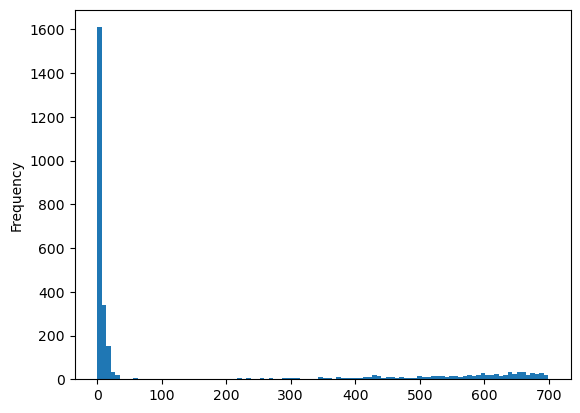

In [59]:
df.loc['sale']['Price/m2'][(df.loc['sale']['Price/m2']<700)].plot.hist(bins=100)

<AxesSubplot: ylabel='Frequency'>

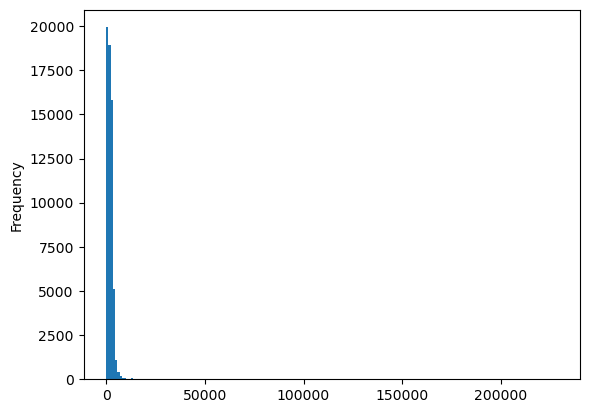

In [38]:
df['Price/m2'].plot.hist(bins=200)

In [27]:
import matplotlib.pyplot as plt
df2.loc['sale'][(df2.loc['sale'][('Target','Price')]<25000) & 
                (df2.loc['sale'][('Group 1','Living Area')]<90)]

Target               Group 1 my features                      
            Price  logPrice Living Area basic count advanced count  malus
Id                                                                       
9757689   22000.0  9.998798        28.0           0              0  -28.0
9931437    1095.0  6.998510        88.0           3              0  440.0
9974573    1175.0  7.069023        72.0           3              0  360.0
10081144  15000.0  9.615805        43.0           1              0    0.0
10187658   1095.0  6.998510        88.0           3              0    0.0
10188447   1095.0  6.998510        88.0           3              0    0.0
10194161   1095.0  6.998510        88.0           2              0  440.0
10211562  16500.0  9.711116        36.0           2              0  180.0
10243824   1175.0  7.069023        76.0           2              1  380.0
10248682   1395.0  7.240650        84.0           3              1    0.0
10264037   1175.0  7.069023        72.0           2              0  360.0
10265002   1175.0  7.069023        72.0           3              0  360.0
10274757   1175.0  7.069023        78.0           4              0  390.0
10277422   1175.0  7.069023        72.0           4              0   72.0
10289586   1175.0  7.069023        72.0           3              0  360.0
10297650   1175.0  7.069023        72.0           3              0  360.0
9961379    1095.0  6.998510        88.0           3              1  440.0
10301653   1175.0  7.069023        76.0           3              0  380.0
10021111   1095.0  6.998510        85.0           5              0  425.0
10052833  20000.0  9.903488        35.0           1              0  -35.0
10083652   1085.0  6.989335        82.0           4              0   82.0
10187359   1095.0  6.998510        88.0           3              1  440.0
10251408   1375.0  7.226209        84.0           2              1   84.0
10258998   2500.0  7.824046        49.0           1              3 -245.0
10264730   1175.0  7.069023        72.0           1              0   72.0
10265065   1350.0  7.207860        75.0           4              0   75.0
10274528   1175.0  7.069023        76.0           3              0  -76.0
10277854   1175.0  7.069023        72.0           3              0  360.0
10279825   1190.0  7.081709        86.0           2              0  -86.0
10288964   1175.0  7.069023        78.0           4              0   78.0
10294728   1190.0  7.081709        86.0           4              0  430.0
10298770   1250.0  7.130899        35.0           2              0    0.0
10298776   1175.0  7.069023        72.0           3              0  360.0
10300403   2250.0  7.718685        85.0           3              1  425.0
10295206   1750.0  7.467371        28.0           4              0    0.0
10294355   1150.0  7.047517        84.0           1              1 -420.0
10295759   1750.0  7.467371        28.0           5              0    0.0
10030371   1095.0  6.998510        84.0           3              1  -84.0
10269451   1350.0  7.207860        75.0           3              1   75.0
10299287   1175.0  7.069023        78.0           2              0  390.0
10299286   1175.0  7.069023        72.0           2              0  360.0
10294431   1190.0  7.081709        86.0           4              0  430.0
10312684   1175.0  7.069023        78.0           1              0  390.0
10312683   1175.0  7.069023        72.0           1              0  360.0
10269887   1175.0  7.069023        78.0           1              0  390.0
10243593   1350.0  7.207860        75.0           1              0   75.0
10294818   1190.0  7.081709        86.0           2              0  430.0
10299116   1190.0  7.081709        86.0           1              0  430.0
10257178   1050.0  6.956545        85.0           2              0  425.0
10261739   1175.0  7.069023        78.0           3              0  390.0
10301469   1190.0  7.081709        86.0           1              0  -86.0
10274530   1745